In [1]:
%pip install face_recognition

In [ ]:
from ctypes import pythonapi
pip install opencv-pythonapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import face_recognition
import cv2
import numpy as np
import csv
import os
import glob
from datetime import datetime

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
import cv2
video_capture = cv2.VideoCapture(0)


In [ ]:
vittal_image=face_recognition.load_image_file("/content/vittal.jpg")
vittal_encoding=face_recognition.face_encodings(vittal_image)[0]

In [ ]:
known_face_recognition=[
    vittal_encoding
]


In [ ]:
known_face_names=[
    "vittal"
]

In [ ]:
students = known_faces_name.copy()

NameError: ignored

In [ ]:
face_location=[]
face_encoding=[]
face_names=[]
s=True

In [ ]:
now = datetime.now()
current_date=now.strftime("%Y-%m-%d")

In [ ]:
f=open(current_date+'.csv','w+',newline='')

while True:
    ret, frame = video_capture.read()
    if not ret:
        continue
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    rgb_small_frame = small_frame[:, :, ::-1]
    if s:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
            face_names.append(name)
            if name in known_face_names:
                if name in students:
                    students.remove(name)
                    print(students)
                    current_time = now.strftime("%H-%M-%S")
                    lnwriter.writerow([name, current_time])


while True:
    ret, frame = video_capture.read()
    if not ret:
        continue
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    rgb_small_frame = small_frame[:, :, ::-1]
    if s:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
            face_names.append(name)
            if name in known_face_names:
                if name in students:
                    students.remove(name)
                    print(students)
                    current_time = now.strftime("%H-%M-%S")
                    lnwriter.writerow([name, current_time])


In [ ]:
while True:
  ret, frame = video_capture.read()
  if not ret:
    break
  small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
  rgb_small_frame = small_frame[:, :, ::-1]
  if s:
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
    face_names = []
    for face_encoding in face_encodings:
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
      name = ""
      face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)
      if matches[best_match_index]:
        name = known_face_names[best_match_index]
      face_names.append(name)
      if name in known_face_names:
        if name in students:
          students.remove(name)
          print(students)
          current_time = now.strftime("%H-%M-%S")
          lnwriter.writerow([name, current_time])
  cv2.imshow("Attendance system", frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break


In [ ]:
video_capture.release()
cv2.destroyAllWindows()
f.close()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


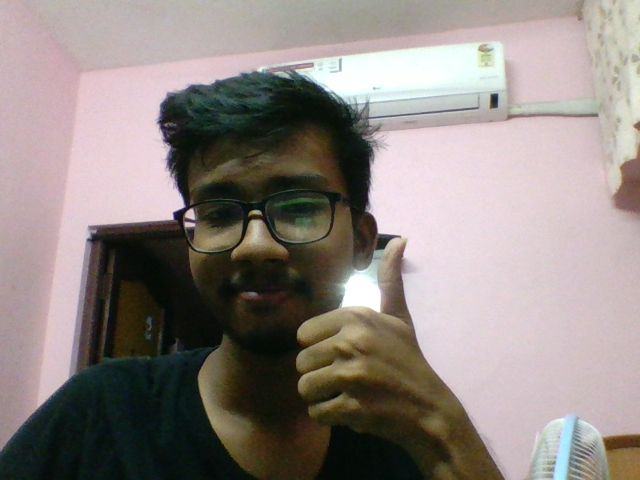

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
captured_image=face_recognition.load_image_file("/content/photo.jpg")
captured_encoding=face_recognition.face_encodings(captured_image)[0]

In [ ]:
result = face_recognition.compare_faces([vittal_encoding], captured_encoding)
if result[0]:
    print("The faces match!")
else:
    print("The faces do not match.")


The faces match!
